+## TAKE HOME TEST - DESCRIPTIVE ANALYSIS

> ### Objective:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### Dataset:
> - The Adult dataset, available at [Kaggle - Titanic](https://www.kaggle.com/c/titanic/data).
> - Contains data about the passengers aboard the Titanic, including age, gender, passenger class, and whether they survived or not.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# Liblary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/titanic_train.csv')

In [3]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (891, 12)


In [5]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
print("Missing values of each column:\n", df.isna().sum())

Missing values of each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Show few rows of the dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


>Based on the analysis results, the dataset has 891 rows and 12 columns, with 3 data types: object, float, and integer. There are missing values, and there is a column 'Age' that should data type changed from float to integer.

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

>After further analysis, it turns out that **the data type of the 'Age' column does not need to be changed to an integer.** This is because, based on the dataset description:
>- 'Age is fractional if less than 1': This means that if someone is less than 1 year old, their age will be represented in fractional form. For example, a person who is 6 months old might be represented as 0.5.
>- Then 'If the age is estimated, is it in the form of xx.5': If someone's age is estimated, the estimate will be represented in the form of xx.5. For instance, if the age is estimated to be around 25 years, it will be represented as 25.5.
>
>In other words, decimal numbers, especially .5, are used to indicate that the age is not an exact number but an estimate. The use of .5 in age estimates helps to convey the uncertainty associated with the estimation.

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [8]:
# Identify any columns that have missing values, you can also show the number and percentage of missing values.
print("Number of missing values in each column:\n", df.isna().sum())
print("\nPercentage of missing values in each column (decimal):\n", (df.isna().sum() / len(df)) * 100)
print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%')

Number of missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values in each column (decimal):
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Percentage of missing values in each column:
 PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object


>#### Handling Missing Values Age with fillna

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Mendapatkan nilai modus dari kolom 'Age'
mode_age = df['Age'].mode()

# Menampilkan nilai modus
print("Mode of Age:", mode_age)

Mode of Age: 0    24.0
Name: Age, dtype: float64


>There is two mode value in 'Age' Column, i will use fillna with 24.0

In [11]:
# Mengganti missing values pada kolom 'Age' dengan nilai modus (24.0)
df['Age'] = df['Age'].fillna(mode_age.iloc[0])

> Handling missing values column 'Cabin' with fillna

In [12]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
# Mengganti missing values pada kolom 'Cabin' dengan modus/top data nya
df['Cabin'] = df['Cabin'].fillna('B96 B98')

> Handling missing values column 'Embarked' using listwise delete/rows delete

In [14]:
#dropping missing values column 'Embarked' using dropna
df_drop = df.dropna()

In [15]:
# reset index
df_drop = df_drop.reset_index(drop=True)

In [16]:
df_drop.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df_drop.shape

(889, 12)

>Finally, **the dataset is now no missing values.** Let's proceed to the next stage of analysis.

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [18]:
df_num = df.select_dtypes(exclude = ['object']) 

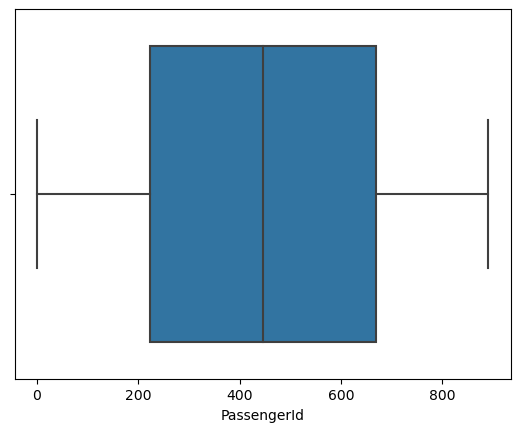

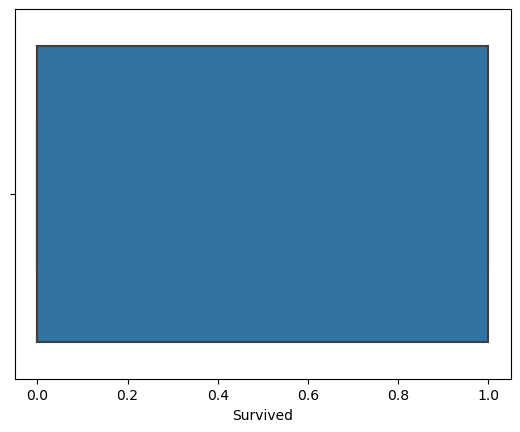

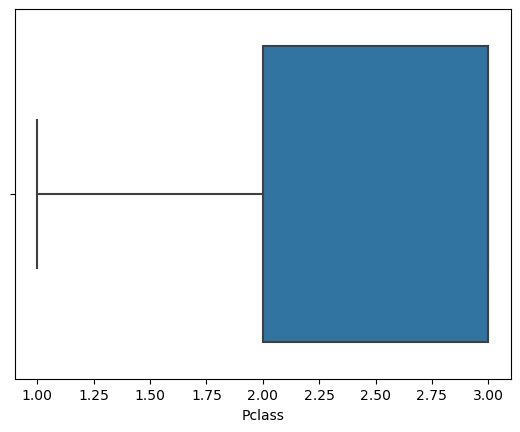

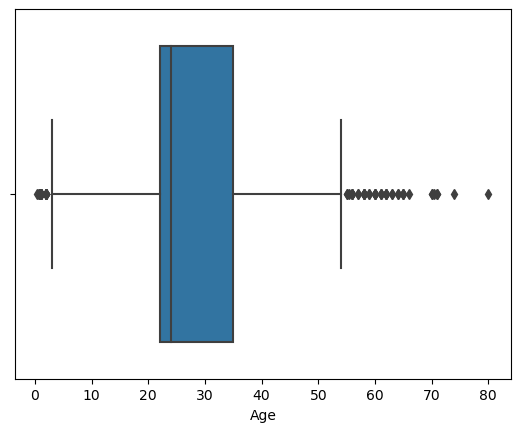

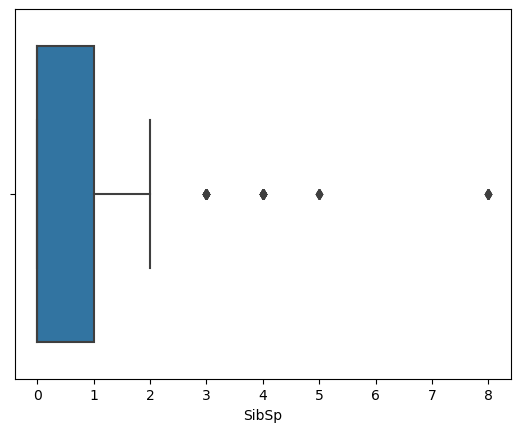

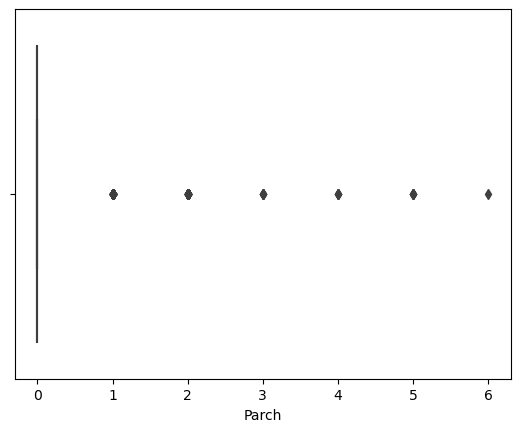

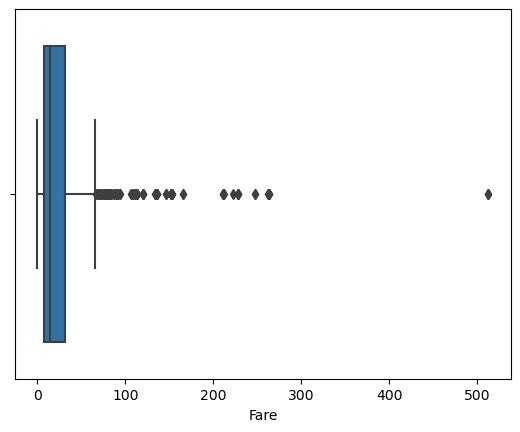

In [19]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

>Based on the analysis results of checking outliers using a boxplot, there are outliers in the dataset in the columns Age, SibSp, Parch, and Fare. I will handle these outliers.

In [20]:
# Fungsi untuk mengidentifikasi outliers menggunakan metode IQR
def find_outliers_iqr(column):
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Mengidentifikasi kolom-kolom dengan outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

# Strategi untuk menangani outliers: Menghapus baris yang mengandung outliers
for column in columns_with_outliers:
    outliers = find_outliers_iqr(column)
    df = df.drop(outliers.index)

In [21]:
# Menampilkan kolom-kolom dengan outliers dan jumlah outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


In [22]:
# Menampilkan informasi setelah penanganan outliers
print("\nNumber of rows after handling outliers:", len(df))


Number of rows after handling outliers: 561


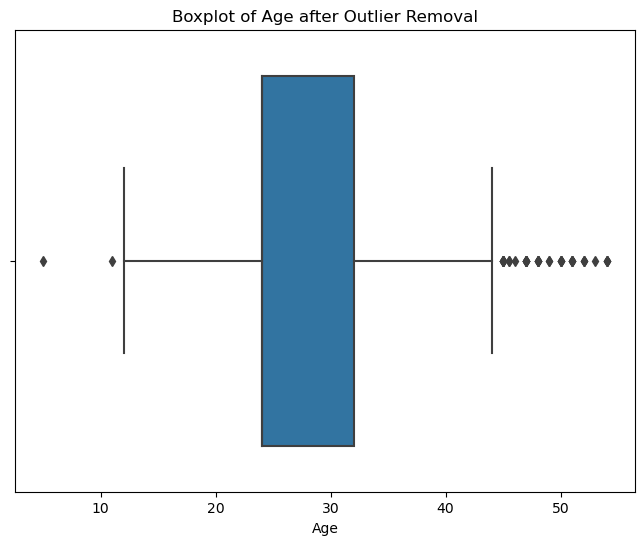

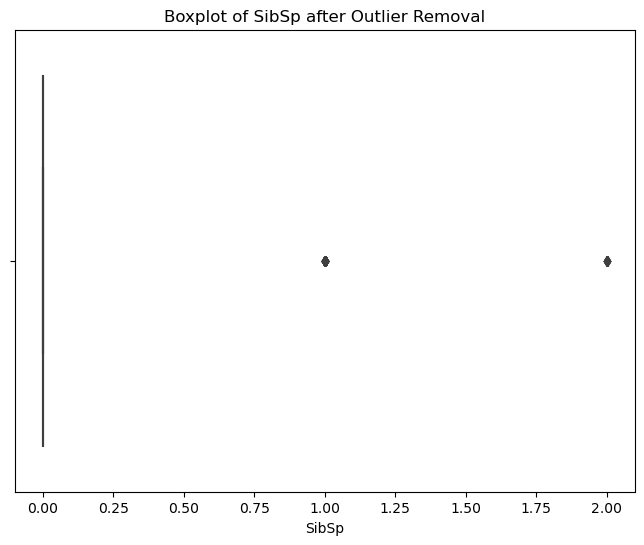

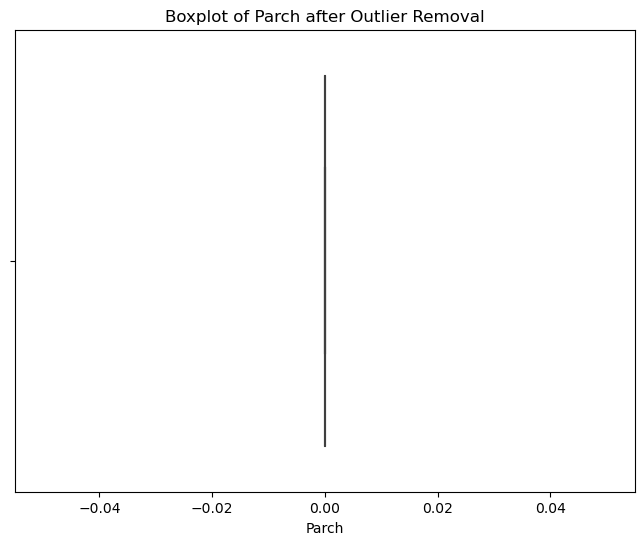

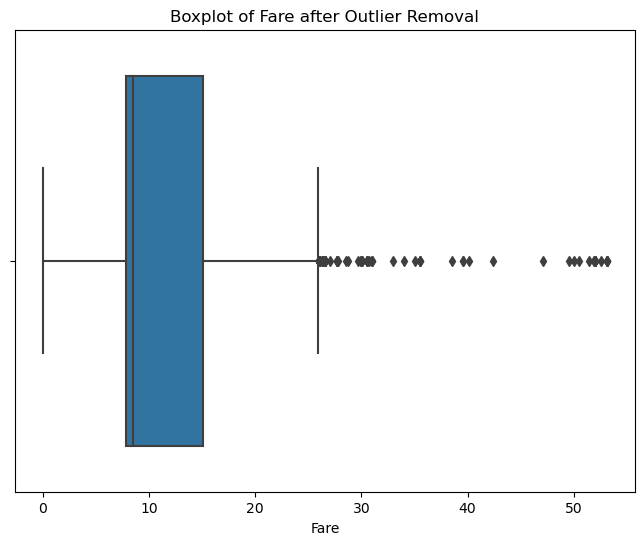

In [23]:
for column in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after Outlier Removal')
    plt.show()

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

> Compute and report central tendencies (mean, median, mode) for relevant columns.

In [24]:
# describing of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.0,561.000000
mean,448.946524,0.286988,2.520499,28.130125,0.190731,0.0,13.727918
std,259.912212,0.452759,0.717155,8.783609,0.440357,0.0,10.560514
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,221.000000,0.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,452.000000,0.000000,3.000000,24.000000,0.000000,0.0,8.458300
75%,675.000000,1.000000,3.000000,32.000000,0.000000,0.0,15.050000
max,891.000000,1.000000,3.000000,54.000000,2.000000,0.0,53.100000


In [25]:
# Computing mean
df.mean(numeric_only=True)

PassengerId    448.946524
Survived         0.286988
Pclass           2.520499
Age             28.130125
SibSp            0.190731
Parch            0.000000
Fare            13.727918
dtype: float64

In [26]:
# Computing median
df.median(numeric_only=True)

PassengerId    452.0000
Survived         0.0000
Pclass           3.0000
Age             24.0000
SibSp            0.0000
Parch            0.0000
Fare             8.4583
dtype: float64

In [27]:
# Computing mode
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,LINE,8.05,B96 B98,S
1,3,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,"Adahl, Mr. Mauritz Nils Martin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,"Adams, Mr. John",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
556,885,NaN,NaN,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,890,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Report dispersions (variance, standard deviation, range) for key numerical columns.

In [28]:
# Computing the range for each feature
for i in df:
    try:
        print(f'{i} range {df[i].max() - df[i].min()}')
    except:
        pass

PassengerId range 890
Survived range 1
Pclass range 2
Age range 49.0
SibSp range 2
Parch range 0
Fare range 53.1


> From information above, the range of the data values of **PassengerId ** is **890**, while the minimum and maximum values are **1 and 891**. this means the data is spread around 3.6 cm in between those values. dst...

In [29]:
# Computing the variance for each feature
df.var(numeric_only=True)

PassengerId    67554.357850
Survived           0.204991
Pclass             0.514311
Age               77.151787
SibSp              0.193914
Parch              0.000000
Fare             111.524449
dtype: float64

>The variance provides information about how spread out the values in a dataset are from their mean. **A high variance indicates a large variation among the values**, while a **low variance indicates a small variation**. Variance is often used in statistical analysis to gain insights into the distribution of data.

In [30]:
# Computing the standard deviation for each feature
df.std(numeric_only=True)

PassengerId    259.912212
Survived         0.452759
Pclass           0.717155
Age              8.783609
SibSp            0.440357
Parch            0.000000
Fare            10.560514
dtype: float64

>Providing standard deviation values for each numeric feature in the Titanic dataset. This information gives an overview of the spread and variability of values in each numeric feature.

>Analyze the distribution of key categorical variables, including counts and proportions.

In [31]:
# Variabel kategorikal yang akan dianalisis
categorical_variables = ['Pclass', 'Sex', 'Embarked', 'Survived', 'SibSp', 'Parch', 'Cabin']

# Analisis distribusi
for variable in categorical_variables:
    # Hitung jumlah dan proporsi
    counts = df[variable].value_counts()
    proportions = df[variable].value_counts(normalize=True).mul(100).round(2)

# Tampilkan hasil secara terstruktur
    print(f"\nDistribution of {variable}:")
    print("==============================")
    print("Counts:")
    print(counts)
    print("\nProportions (%):")
    print(proportions)
    print("\n" + "="*30)  # Garis pembatas antar distribusi


Distribution of Pclass:
Counts:
3    366
2    121
1     74
Name: Pclass, dtype: int64

Proportions (%):
3    65.24
2    21.57
1    13.19
Name: Pclass, dtype: float64


Distribution of Sex:
Counts:
male      422
female    139
Name: Sex, dtype: int64

Proportions (%):
male      75.22
female    24.78
Name: Sex, dtype: float64


Distribution of Embarked:
Counts:
S    421
C     76
Q     64
Name: Embarked, dtype: int64

Proportions (%):
S    75.04
C    13.55
Q    11.41
Name: Embarked, dtype: float64


Distribution of Survived:
Counts:
0    400
1    161
Name: Survived, dtype: int64

Proportions (%):
0    71.3
1    28.7
Name: Survived, dtype: float64


Distribution of SibSp:
Counts:
0    465
1     85
2     11
Name: SibSp, dtype: int64

Proportions (%):
0    82.89
1    15.15
2     1.96
Name: SibSp, dtype: float64


Distribution of Parch:
Counts:
0    561
Name: Parch, dtype: int64

Proportions (%):
0    100.0
Name: Parch, dtype: float64


Distribution of Cabin:
Counts:
B96 B98        491
D     

>By doing this, we can understand the distribution of data on specific categorical variables, see the most common values, and gain insights into how these categories are distributed in the dataset.

>Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

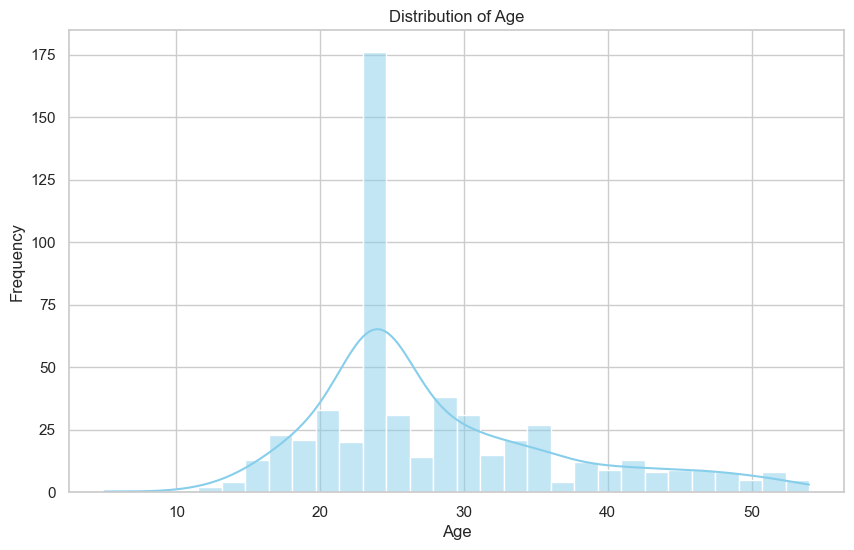

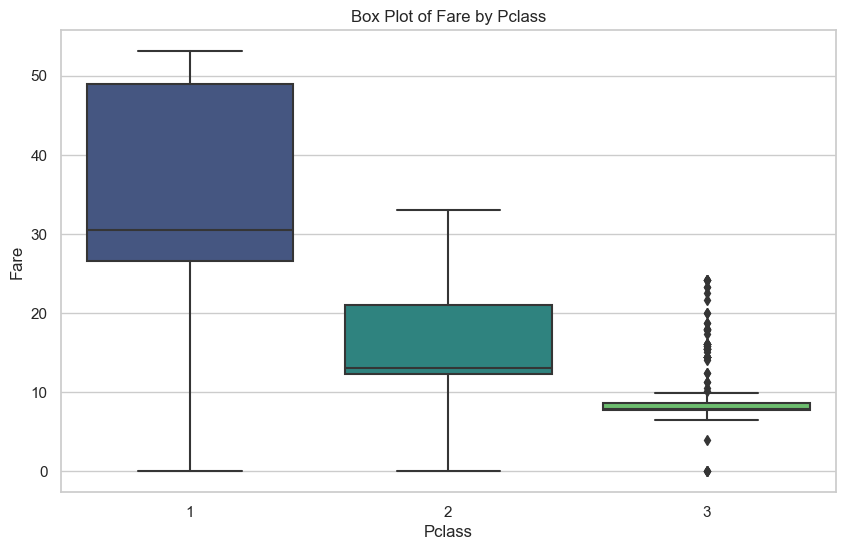

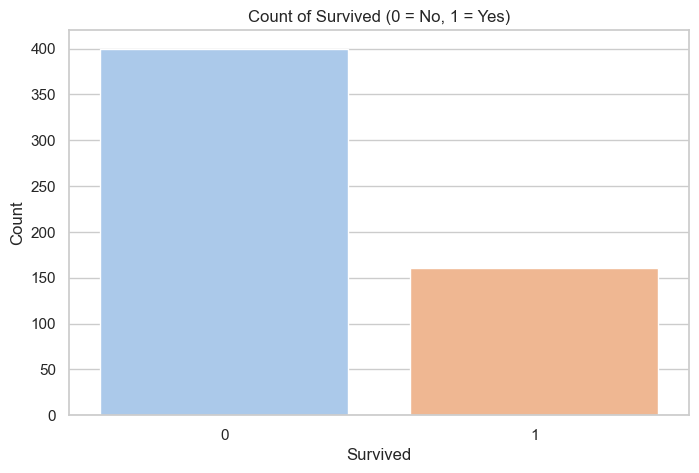

In [32]:
# Set style for seaborn
sns.set(style="whitegrid")

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')
plt.title('Box Plot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Bar chart for counts of Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Count of Survived (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [33]:
len(df)

561

In [34]:
df.shape

(561, 12)

### 6. SUMMARY
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

>Based on the descriptive analysis, here are the key findings:
>1. **Passenger Class (Pclass)**: The majority of passengers are in Class 3 (approximately 65.24%), followed by Class 2 (approximately 21.57%) and Class 1 (approximately 13.19%).
>2. **Gender (Sex)**: The dataset consists of more male passengers (approximately 75.22%) than female passengers (approximately 24.78%).
>3. **Embarked Port (Embarked)**: Most passengers boarded the ship from Southampton (S) with a proportion of around 75.04%, followed by Cherbourg (C) with approximately 13.55%, and Queenstown (Q) with around 11.41%.
>4. **Survival Status (Survived)**: About 71.30% of passengers did not survive (Survived = 0), while approximately 28.70% survived (Survived = 1).
>5. **Siblings/Spouses (SibSp)**: The majority of passengers (82.89%) traveled without siblings or spouses (SibSp = 0).
>6. **Parents/Children (Parch)**: All passengers in the dataset have Parch = 0, indicating that they were not traveling with parents or children.
>7. **Cabin**: The dataset has a wide variety of cabin values, with 'B96 B98' being the most common (87.52%).
>
>These findings provide a comprehensive overview of the distribution of key variables in the Titanic dataset, offering insights into the demographics and characteristics of the passengers.